In [1]:
import pandas as pd
import statistics as st

In [2]:
score_df = pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
score_df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [3]:
#TASK1
Mean = []
Median = []
Mode = []

for col in score_df:
   Mean.append(score_df.loc[:,col].mean())
   Median.append(score_df.loc[:,col].median())
   Mode.append(st.mode(score_df[col]))

row_head = ['Mean','Median','Mode']  
col_names = ['Statistics','Python','Tableau']  

d_data = pd.DataFrame([Mean,Median,Mode],columns= col_names)
d_data.insert(0,'Measures',row_head,True)
d_data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


In [7]:
#TASK2
Mean = []
Variance = []
SD = []
CV= []

for col in score_df:
    col_mean = score_df.loc[:,col].mean()
    Mean.append(col_mean)
    col_sd = score_df.loc[:,col].std()
    SD.append(col_sd)
    col_v = score_df.loc[:,col].var()
    Variance.append(col_sd)
    CV.append(col_sd/col_mean*100)

row_head = ['Mean','Variance','Coefficient_of_Variation']   
col_names = ['Statistics','Python','Tableau']  

data = pd.DataFrame([Mean,Variance,CV],columns= col_names)

data.insert(0,'Measures',row_head,True)
data

,Measures,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Variance,7.236126,4.345484,7.320899
2,Coefficient_of_Variation,11.883931,5.309731,10.762862


In [9]:
#TASK3
import matplotlib.pyplot as plt

In [11]:
for subject in score_df:
    LO = []  
    UO = []  
    column_series = pd.Series(score_df[subject])  
    Min = min(column_series)
    Max = max(column_series)
    Range = Max-Min 
    Q1 = column_series.quantile(0.25)
    Q3 = column_series.quantile(0.75)
    IQR = Q3-Q1
    UF = Q3 + 1.5*IQR
    LF = Q1 - 1.5*IQR

    for z in score_df[subject]:
        if z<LF:
            LO.append(z)
        if z>UF:
            UO.append(z)
    if(subject== 'Statistics'):
        Statistics = ('Statistics' ,Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO])
    elif(subject== 'Python'):
        Python = ('Python' ,Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO])
    else:
        Tableau = ('Tableau',Min, Max, Range, Q1, Q3, IQR, UF, LF, [LO, UO])

col_name = ['subject','Min', 'Max', 'Range', 'Q1', 'Q3', 'IQR', 'UpperFence', 'LowerFence', 'Outliers']

dispersion_data = pd.DataFrame([Statistics,Python,Tableau],columns = col_name)
dispersion_data

,subject,Min,Max,Range,Q1,Q3,IQR,UpperFence,LowerFence,Outliers
0,Statistics,50,74,24,54.0,67.00,13.00,86.500,34.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,98.000,66.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,87.125,50.125,"[[45, 50, 50, 50, 46, 46], []]"


In [13]:
#TASK4
Statistics_data = score_df['Statistics'].tolist()
Python_data = score_df['Python'].tolist()
Tableau_data = score_df['Tableau'].tolist()

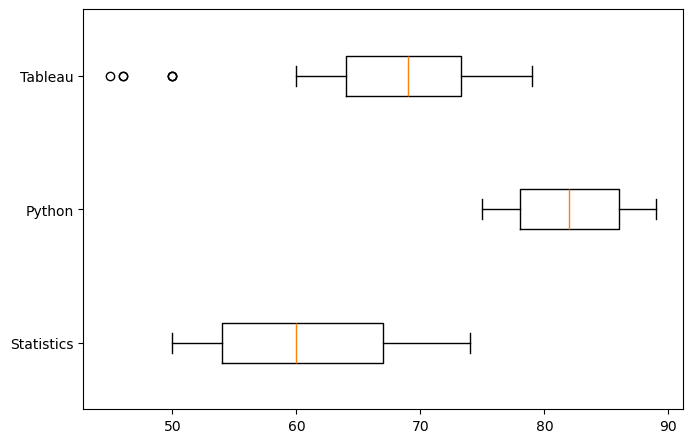

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
plt.boxplot([Statistics_data,Python_data,Tableau_data],vert = 0)
ax.set_yticklabels(['Statistics','Python','Tableau'])
plt.show()

In [24]:
#TASK5
from scipy.stats import norm

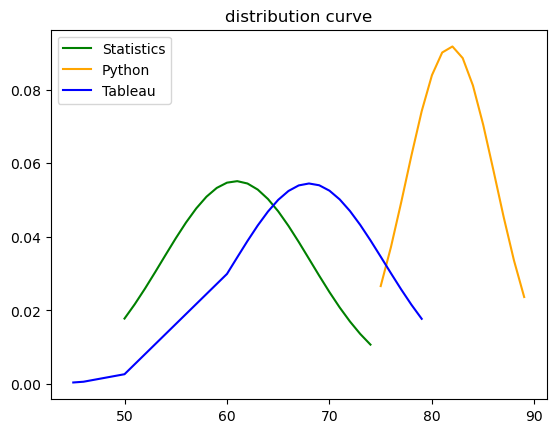

In [28]:
Statistics_data = sorted(Statistics_data)
Python_data = sorted(Python_data)
Tableau_data = sorted(Tableau_data)

plt.title('distribution curve')

S_mean = st.mean(Statistics_data)
S_SD = st.stdev(Statistics_data)
P_mean = st.mean(Python_data)
P_SD = st.stdev(Python_data)
T_mean = st.mean(Tableau_data)
T_SD = st.stdev(Tableau_data)

plt.plot(Statistics_data,norm.pdf(Statistics_data,S_mean,S_SD),color = 'green',label = 'Statistics')
plt.plot(Python_data,norm.pdf(Python_data,P_mean,P_SD),color = 'orange',label = 'Python')
plt.plot(Tableau_data,norm.pdf(Tableau_data,T_mean,T_SD),color = 'blue',label = 'Tableau')

plt.legend()

plt.show()

In [30]:
from scipy.stats import kurtosis

In [32]:
print('kurtosis of Statistics:',kurtosis(Statistics_data))
print('kurtosis of Python:',kurtosis(Python_data))
print('kurtosis of Tableau:',kurtosis(Tableau_data))

kurtosis of Statistics: -1.2890343729055107
kurtosis of Python: -1.2748529079288784
kurtosis of Tableau: 1.442459054422362
